### Monty Hall Paradox

3 doors, behind one of them there is a car, behind the others a goat.\
A player chooses a door.\
The host of the game opens a door behind which there is a goat.\
A player decides to change his choice or not and the other does not.\
Which player is most likely to win the game?

In [2]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

In [3]:
car_position = np.random.randint(0,3)

In [4]:
configuration = [0,0,0]
configuration[car_position] = 1

In [5]:
def game():
    no_change = 0
    change = 0
    global configuration
    global gamer_first_choice
    if gamer_first_choice == car_position:
        no_change = 1
    host_choice = np.where(np.array(configuration) == 0)[0][0]
    if host_choice == gamer_first_choice:
        host_choice = np.where(np.array(configuration) == 0)[0][1]
    if host_choice != gamer_first_choice:
        gamer_second_choice, = {0,1,2} - {host_choice, gamer_first_choice}
        if gamer_second_choice == car_position:
            change = 1
    return no_change, change

In [6]:
trials = np.arange(100,1e4,500, dtype=int)
results = np.zeros((len(trials), 2), dtype=float)  # Creates an Nx2 array with (0,0)

In [7]:
for i,N in enumerate(trials):
    no_change_wins = 0
    change_wins = 0
    for n in range(N):
        gamer_first_choice  = np.random.randint(0,3)
        outcome             = game()
        no_change_wins      += outcome[0]
        change_wins         += outcome[1]
    results[i,0] = no_change_wins/N
    results[i,1] = change_wins/N

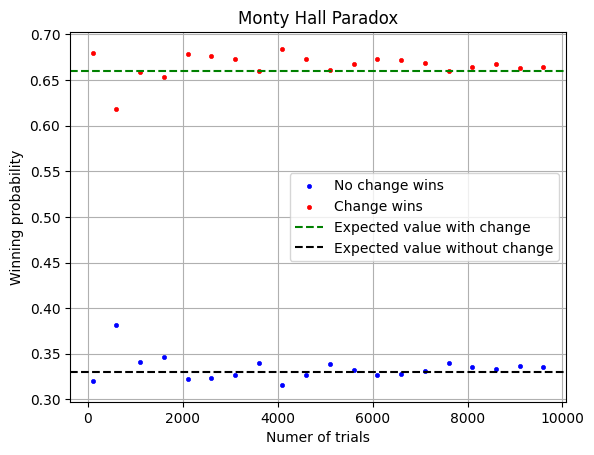

In [8]:
plt.scatter(trials, results[:,0], marker='.', color='blue', linewidth=0.5,label='No change wins')
plt.scatter(trials, results[:,1], marker='.', color='red', linewidth=0.5,label='Change wins')
plt.xlabel('Numer of trials')
plt.ylabel('Winning probability')
plt.title('Monty Hall Paradox')
plt.axhline(0.66, color='green', linestyle='--', label='Expected value with change')
plt.axhline(0.33, color='black', linestyle='--', label='Expected value without change')
plt.grid()
plt.legend()

Untill now everything is fine!\
Now let's try to generalize this to N doors.\
The host opens a number p less then N.

In [9]:
def game_general(change,gamer_first_choice,car_position,initial_set,p):
    """
    Simulates one round of a generalized Monty Hall game.

    Parameters:
        change (bool): If True, the player switches their initial choice.
        p (int): The number of doors the host opens.
        D (int): Total number of doors.

    Returns:
        int: 1 if the player wins, 0 otherwise.
    """
    wins = 0

    # Host's available doors: cannot reveal the car or the player's first choice.
    host_set = initial_set - {car_position} - {gamer_first_choice}

    # Host opens p doors (without replacement)
    host_choices = np.random.choice(list(host_set), size=p, replace=False)

    if change:
        # The remaining door (since D-1 doors are known, only 1 is left)
        gamer_second_choice = (initial_set - set(host_choices) - {gamer_first_choice}).pop()
        
        if gamer_second_choice == car_position:
            wins = 1
    else:
        if gamer_first_choice == car_position:
            wins = 1

    return wins


In [10]:
D = 3 # number of doors
P = 1  # number of doors opend by the host

In [11]:
car_position = np.random.randint(D)
configuration = np.zeros(D, dtype=int)
configuration[car_position] = 1

In [12]:
trials  = np.arange(100,1e4, 500)
results = np.zeros(len(trials))
results_GPT = np.zeros(len(trials))
change  = True
for i,trial in enumerate(trials):
    wins      = 0
    wins_GPT  = 0
    for _ in range(int(trial)):
        initial_set = set(range(D))
        gamer_first_choice = np.random.randint(D)
        wins += game_general(change,gamer_first_choice,car_position,initial_set,P) 
    results[i] = wins/trial

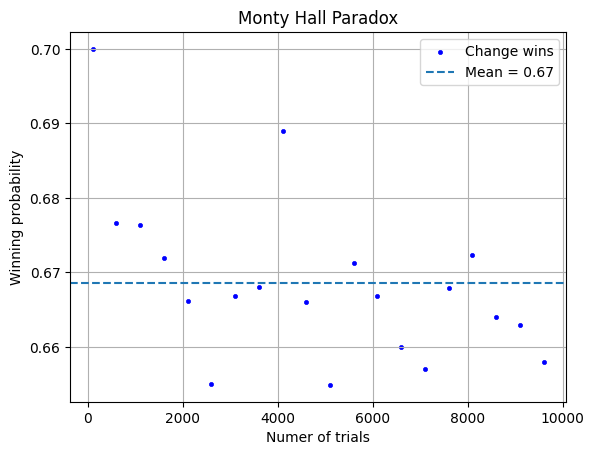

In [13]:
plt.scatter(trials, results, marker='.', color='blue', linewidth=0.5,label='Change wins')
plt.axhline(results.mean(), 0, 1, linestyle='--',label=f'Mean = {results.mean():.2}')
plt.xlabel('Numer of trials')
plt.ylabel('Winning probability')
plt.title('Monty Hall Paradox')
plt.grid()
plt.legend()

So the generaliztion of the code, for 3 doors and 1 openedd door works out fine!\
Let's bring the numbers up to 10 doors and 8 opened doors.\
We expect a mean winning probability of about 90 %.

In [14]:
D = 10 # number of doors
P = 8  # number of doors opend by the host

In [15]:
car_position = np.random.randint(D)
configuration = np.zeros(D, dtype=int)
configuration[car_position] = 1

In [16]:
trials  = np.arange(100,1e4, 500)
results = np.zeros(len(trials))
change  = True
for i,trial in enumerate(trials):
    wins      = 0
    wins_GPT  = 0
    for _ in range(int(trial)):
        initial_set = set(range(D))
        gamer_first_choice = np.random.randint(D)
        wins += game_general(change,gamer_first_choice,car_position,initial_set,P) 
    results[i] = wins/trial

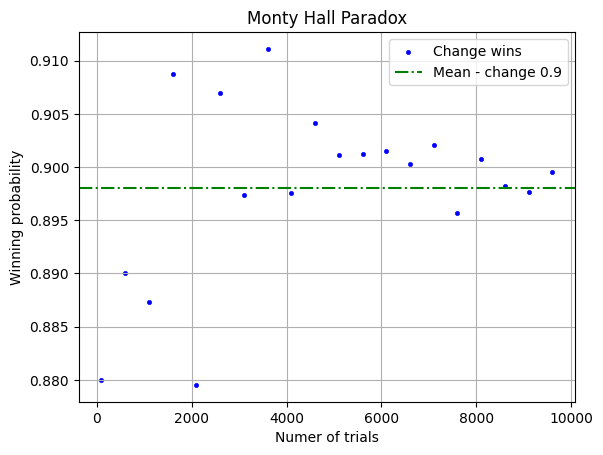

In [17]:
plt.scatter(trials, results, marker='.', color='blue', linewidth=0.5,label='Change wins')
plt.xlabel('Numer of trials')
plt.ylabel('Winning probability')
plt.title('Monty Hall Paradox')
plt.axhline(results.mean(), color='green', linestyle='-.', label=f'Mean - change {results.mean():.2}')
plt.grid()
plt.legend()

Everything is fine!\
We are ready to bring the numbers up!

# Winning Probability Formula for Generalized Monty Hall Problem

The probability of winning when **switching** in a Monty Hall game with \( N \) total doors and \( P \) doors opened by the host is given by:

$$P_{\text{win}} = \frac{N-1}{N(N - 1 - P)}$$

where:
- \( N \) is the total number of doors.
- \( P \) is the number of doors opened by the host.

### Example Cases:

For different values of \( N \) and \( P \):

|  N  |  P |  $P_{\text{win}}$  |
|---|---|---|
| 3 | 1 |  $0.66$ |
| 4 | 1 | $0.38$ |
| 4 | 2 | $0.75$ |
| 5 | 2 | $0.27$ |
| 5 | 3 | $0.4$ |
| 10 | 8 |$0.9$ |

This formula shows that switching is **always beneficial** as long as \( P < N-1 \).


In [18]:
N = [3,5,8]
P = np.arange(min(N)-2, max(N)-1,1)

In [19]:
trials = np.arange(100,1e4, 100)
matrix = np.empty((len(N), len(P), len(trials)))
for i, n in enumerate(N):
    car_position = np.random.randint(n)
    configuration = np.zeros(n)
    configuration[car_position] = 1
    for j, p in enumerate(P):
        if p <= n-2:
            results = []
            for k,trial in enumerate(trials):
                wins    = 0
                for _ in range(int(trial)):
                    initial_set = set(range(n))
                    gamer_first_choice = np.random.randint(n)
                    wins += game_general(change,gamer_first_choice,car_position,initial_set,p) 
                results.append(wins/trial)
            matrix[i,j] = results
        else:
            matrix[i,j] = np.zeros(len(trials))


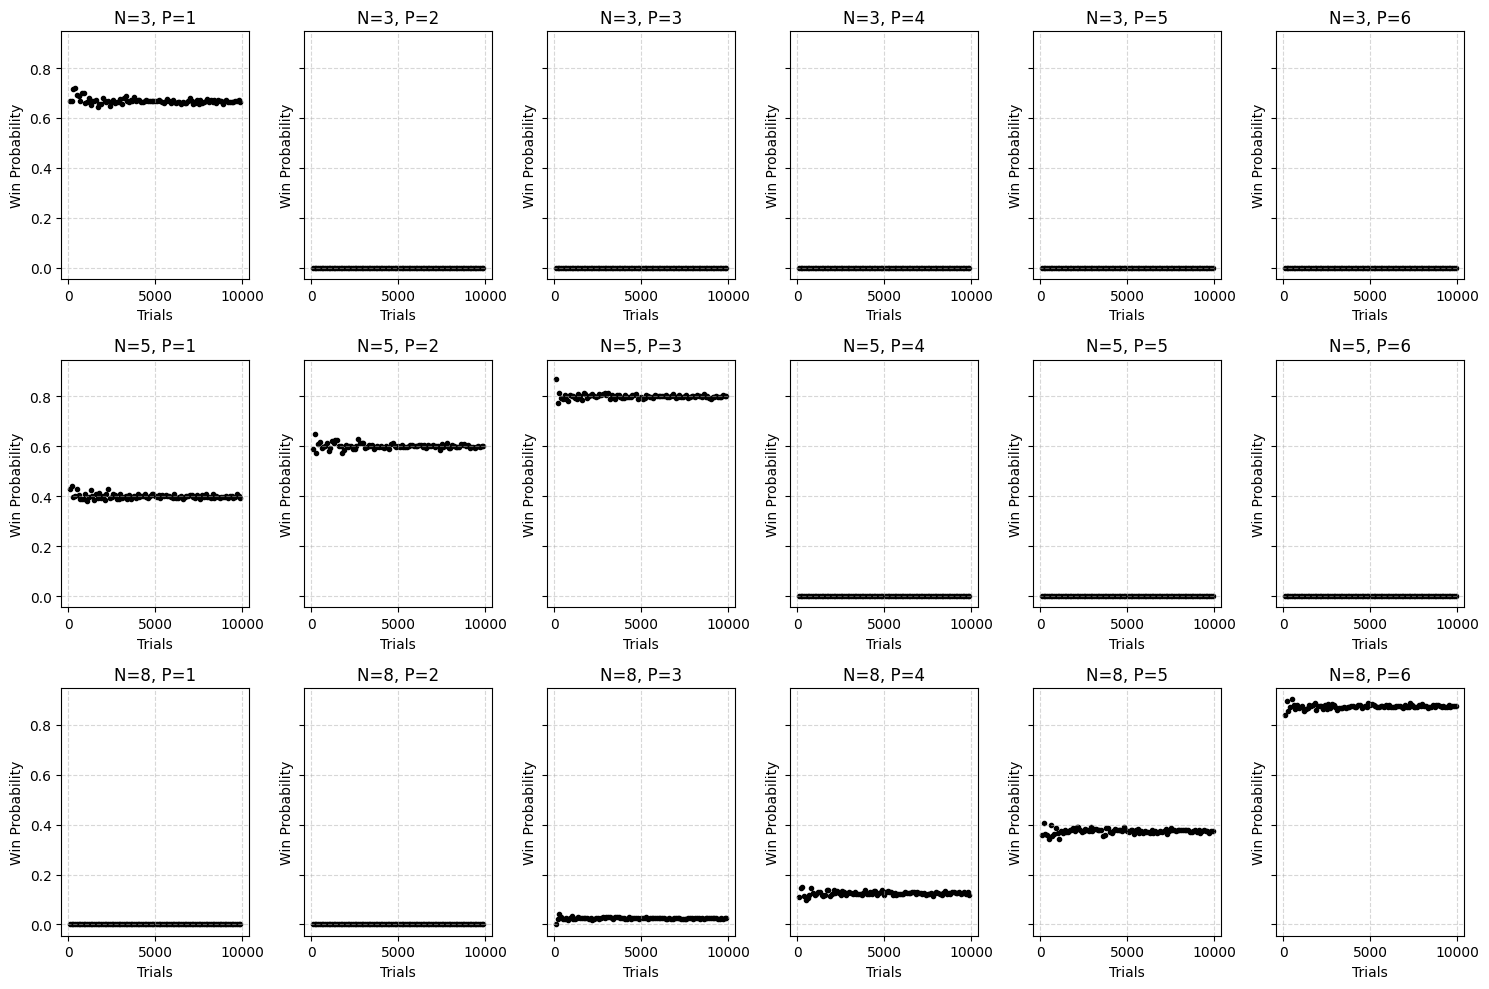

In [20]:
fig, axes = plt.subplots(len(N), len(P), figsize=(15,10), sharex=False, sharey=True)

# Ensure axes is a 2D array even when there's only one subplot
if not isinstance(axes, np.ndarray):
    axes = np.array([[axes]])


for i, n in enumerate(N):
    for j, p in enumerate(P):
        ax = axes[i, j]  # Correct way to index 2D axes
        ax.scatter(trials, matrix[i, j], color='black', marker='.')
        ax.set_title(f"N={n}, P={p}")
        ax.set_xlabel("Trials")
        ax.set_ylabel("Win Probability")
        ax.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()


In [21]:
N = np.arange(3,20,1)
P = np.arange(min(N)-2, max(N)-1,1)

In [22]:
trials = np.arange(100,1e4, 500)
matrix_2 = np.empty((len(N), len(P), len(trials)))
for i, n in enumerate(N):
    car_position = np.random.randint(n)
    configuration = np.zeros(n)
    configuration[car_position] = 1
    for j, p in enumerate(P):
        if p <= n-2:
            results = []
            for k,trial in enumerate(trials):
                wins    = 0
                for _ in range(int(trial)):
                    initial_set = set(range(n))
                    gamer_first_choice = np.random.randint(n)
                    wins += game_general(change,gamer_first_choice,car_position,initial_set,p) 
                results.append(wins/trial)
            matrix_2[i,j] = results
        else:
            matrix_2[i,j] = np.zeros(len(trials))


In [23]:
means, devs = [], []
for i in range(len(N)):
    for j in range(len(P)):
        if P[j] == N[i]-2:
            means.append(matrix_2[i,j].mean())
            devs.append(np.sqrt(means[-1])/N[i])

In [24]:
def prob(N, P):  
    return (N - 1) / (N * (N - 1 - P))

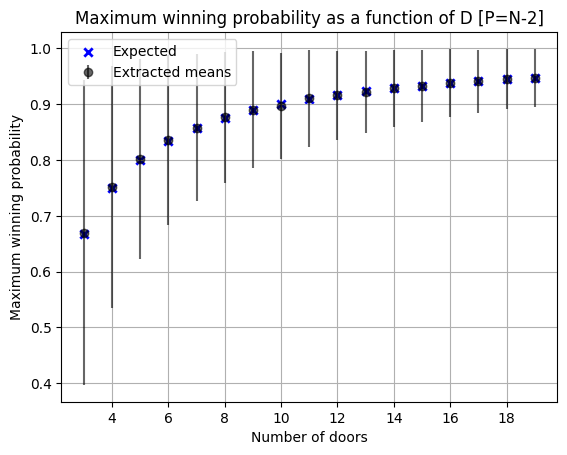

In [25]:
plt.title('Maximum winning probability as a function of D [P=N-2]')
plt.errorbar(N, means, devs, fmt='o', label='Extracted means', alpha=0.6, color='black')
plt.scatter(N, prob(N, P), marker='x', linewidth=2, color='blue', label='Expected')
plt.xlabel('Number of doors')
plt.ylabel('Maximum winning probability')
plt.legend()
plt.grid()

Let's plot this as a function of N and P

In [28]:
means, devs = [], []
for i in range(len(N)):
    means_P, devs_P = [], []
    for j in range(len(P)):
        means_P.append(matrix_2[i,j].mean())
        devs_P.append(np.sqrt(means_P[-1])/N[i])
    means.append(means_P)
    devs.append(devs_P)

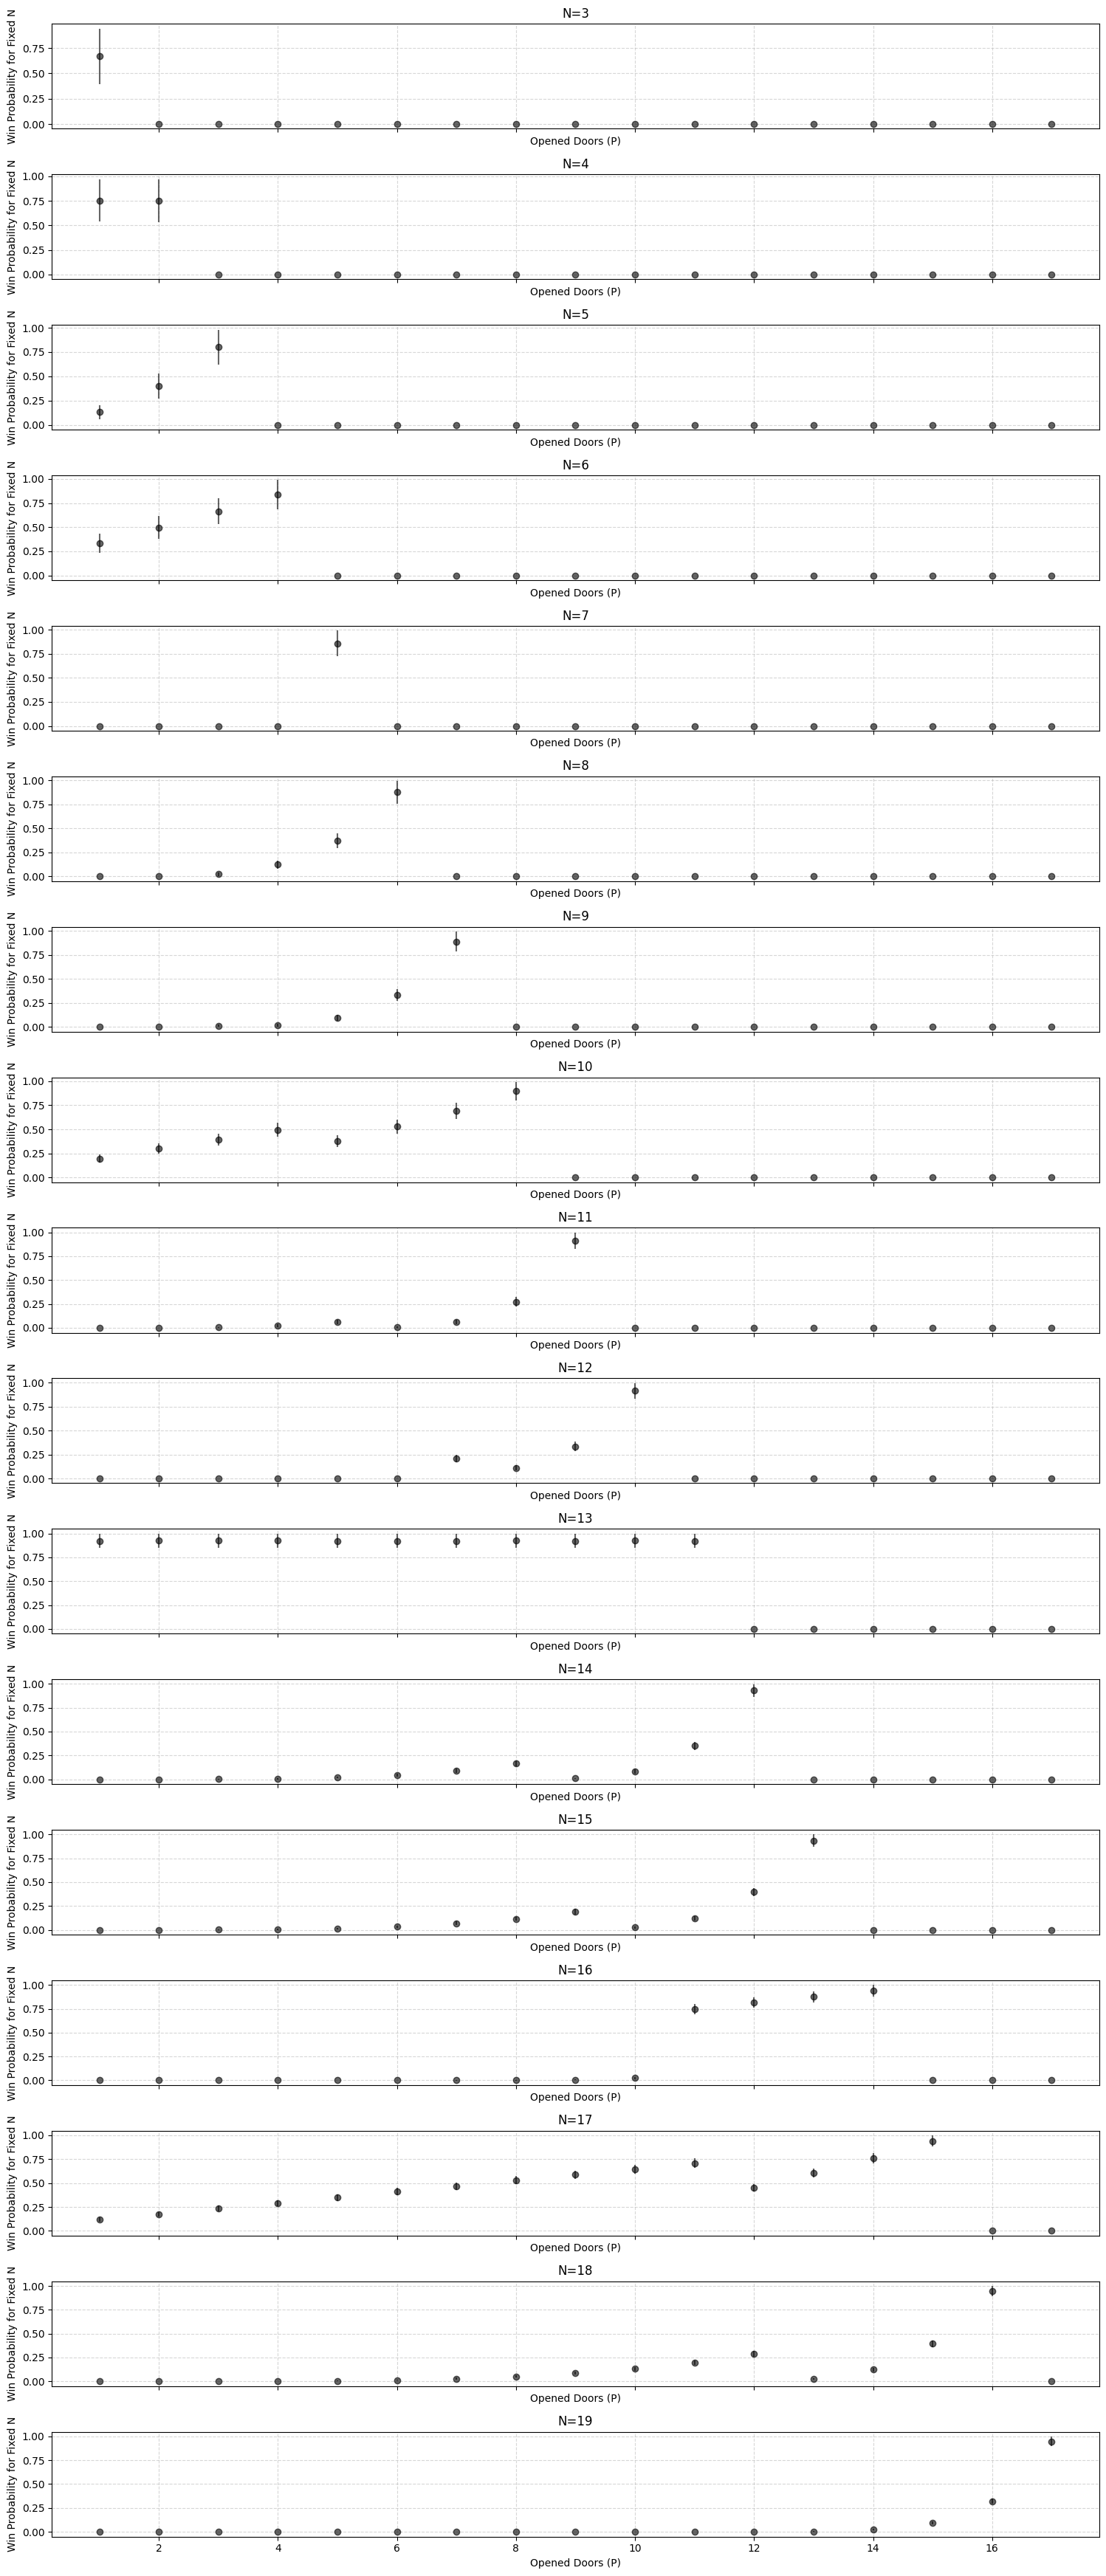

In [38]:
fig, axes = plt.subplots(len(N), 1, figsize=(15,35), sharex=True, sharey=False)

for i, n in enumerate(N):
    axes[i].errorbar(P, means[i], yerr=devs[i], fmt='o', color='black', alpha=0.6)
    axes[i].set_title(f"N={n}")
    axes[i].set_xlabel("Opened Doors (P)")
    axes[i].set_ylabel("Win Probability for Fixed N")
    axes[i].grid(True, linestyle="--", alpha=0.5)

plt.subplots_adjust(hspace=5)  # Increase vertical space between subplots
plt.tight_layout()